# 4950  kaggle
fe

HT de 4940

train 04

final train 04

future 06

##  1. Big Picture

LightGBM es el algoritmo estado del arte para datasets estructurados.
<br> La Bayesian Optimization es el estado del arte para optimización de hiperparámetros
<br> Las soluciones a las tres competencias de la asignatura contendrán LightGBMs y Bayesian Optimizations
<br> LightGBM ha aumentado en forma no darwiniana sus hiperparámetros en los últimos ocho años; no todos los existentes son útiles.
<br> Es necesario lograr entender cuales son los hiperparámetros relevantes de LightGBM

## 2. Hiperparámetros del LightGBM

Los objetivos de esta tarea son:


*   Aumentar la rentabilidad de la campaña de marketing de retención proactiva de clientes.
*   Generar un mejor modelo optimizando sus hiperparámetros
*   Conceptual : investigar los mas relevantes hiperparámetros de LightGBM
*   Familiarizarse con la Bayesian Optimization, sus largos tiempos de corrida y opciones para reducirlos
*   Familiarizarse con el uso de máquinas virtuales de Google Colab
*   Ver un pipeline completo de optimización de hiperparámetros y puesta en producción

LightGBM cuenta con mas de 60 hiperparámetros, siendo posible utilizar 40 al mismo tiempo, aunque no razonable.
<br> La documentación oficial de los hiperparámetros de LightGBM es  https://lightgbm.readthedocs.io/en/latest/Parameters.html#core-parameters


Se lo alerta sobre que una Optimizacion Bayesiana lleva varias horas de corrida, y usted deberá correr VARIAS optimizaciones para descubrir cuales parámetros conviene optimizar.
<br> A pesar que la próxima clase es recien en viernes 01 de agosto, inicie la tarea con tiempo, aprenda a planificar estratégicamente sus corridas como un@ científ@  de datos.

Es necesario investigar cuales son los hiperparámetros de LightGBM que vale la pena optimizar en una Bayesian Optimization, ya que los realmente utiles son apenas un reducido subconjunto.
<br>Usted deberá investigar cuales son los hiperparámetros mas relevantes de LightGBM, su primer alternativa es preguntándole a su amigo con capacidades especiales ChatGPT o sus endogámicos familiares Claude, DeepSeek, Gemini, Grok, etc
<br> La segunda alternativa es la propia documentación de LightGBM  https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html


Adicionalmente podra buscar información como la que proveen esta diminuta muestra aleatoria de artículos ligeros:
*  https://medium.com/@sarahzouinina/a-deep-dive-into-lightgbm-how-to-choose-and-tune-parameters-7c584945842e
*  https://www.kaggle.com/code/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
*  https://towardsdatascience.com/beginners-guide-to-the-must-know-lightgbm-hyperparameters-a0005a812702/


<br>  La muestra anterior se brinda a modo de ejemplo, usted deberá buscar muuuuchas  fuentes adicionales de información
<br> Tenga presente que LightGBM es el estado del arte en modelado predictivo para datasets estructurado, que son el 90% del trabajo del 95% de los Data Scientists en Argentina.

El desafío de esta tarea es:
* Qué hiperparparámetros conviene optimizar?  Las recomendaciones de los artículos ligeros es siempre sensata?  Sus autores realmente hicieron experimentos o son siemplemente escritores de entretenimiento carente de base científica?
* Elegidos los hiperparámetros, cual es el  <desde, hasta> que se debe utilizar en la Bayesian Optimization ?
* Realmente vale la pena optimizar 10 o 16 hiperparámetros al mismo tiempo ?  No resulta contraproducente una búsqueda en un espacio de tal alta dimensionalidad ?

#### 2.1  Seteo del ambiente en Google Colab

Esta parte se debe correr con el runtime en Python3
<br>Ir al menu, Runtime -> Change Runtime Type -> Runtime type ->  **Python 3**

Conectar la virtual machine donde esta corriendo Google Colab con el  Google Drive, para poder tener persistencia de archivos

In [1]:
# primero establecer el Runtime de Python 3
from google.colab import drive
drive.mount('/content/.drive')

MessageError: Error: credential propagation was unsuccessful

Para correr la siguiente celda es fundamental en Arranque en Frio haber copiado el archivo kaggle.json al Google Drive, en la carpeta indicada en el instructivo

<br>los siguientes comando estan en shell script de Linux
*   Crear las carpetas en el Google Drive
*   "instalar" el archivo kaggle.json desde el Google Drive a la virtual machine para que pueda ser utilizado por la libreria  kaggle de Python
*   Bajar el  **dataset_pequeno**  al  Google Drive  y tambien al disco local de la virtual machine que esta corriendo Google Colab



In [ ]:
%%shell

mkdir -p "/content/.drive/My Drive/dmeyf"
mkdir -p "/content/buckets"
ln -s "/content/.drive/My Drive/dmeyf" /content/buckets/b1


mkdir -p /content/buckets/b1/exp
mkdir -p /content/buckets/b1/datasets
mkdir -p /content/datasets



archivo_origen="https://storage.googleapis.com/open-courses/dmeyf2025-e4a2/competencia_01_crudo.csv"
archivo_destino="/content/datasets/competencia_01_crudo.csv"
archivo_destino_bucket="/content/buckets/b1/datasets/competencia_01_crudo.csv"

if ! test -f $archivo_destino_bucket; then
  wget  $archivo_origen  -O $archivo_destino_bucket
fi


if ! test -f $archivo_destino; then
  cp  $archivo_destino_bucket  $archivo_destino
fi


In [ ]:
# !pip install gputil

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=5da9316189770c37ecc0fd1fee01a4f535870a2219278e9f528edfd77ed9e47e
  Stored in directory: /root/.cache/pip/wheels/92/a8/b7/d8a067c31a74de9ca252bbe53dea5f896faabd25d55f541037
Successfully built gputil


In [ ]:
import os
import psutil
import cpuinfo
import GPUtil

# --- CPU ---
info_cpu = cpuinfo.get_cpu_info()
print("=== CPU ===")

try:
    cpu_model = info_cpu['brand_full']
except KeyError:
    cpu_model = info_cpu.get('brand_raw', 'Unknown CPU Model')

print(f"Modelo       : {cpu_model}")
print(f"Núcleos      : {os.cpu_count()}")
print(f"Velocidad    : {info_cpu.get('hz_advertised_friendly', 'Unknown Speed')}")
print()

# --- RAM ---
print("=== RAM ===")
ram = psutil.virtual_memory()
print(f"Total        : {ram.total / (1024**3):.2f} GB")
print(f"Disponible   : {ram.available / (1024**3):.2f} GB")
print(f"En uso       : {ram.percent}%")
print()

# --- GPU ---
print("=== GPU ===")
try:
    gpus = GPUtil.getGPUs()
    if gpus:
        for gpu in gpus:
            print(f"Nombre       : {gpu.name}")
            print(f"Memoria Total: {gpu.memoryTotal}MB")
            print(f"Memoria Usada: {gpu.memoryUsed}MB")
            print(f"Memoria Libre: {gpu.memoryFree}MB")
    else:
        print("No hay GPU disponible en este entorno")
except Exception as e:
    print(f"No hay GPU disponible en este entorno: {e}")

=== CPU ===
Modelo       : Intel(R) Xeon(R) CPU @ 2.20GHz
Núcleos      : 8
Velocidad    : 2.2000 GHz

=== RAM ===
Total        : 50.99 GB
Disponible   : 49.53 GB
En uso       : 2.9%

=== GPU ===
No hay GPU disponible en este entorno


## Generacion de la clase_ternaria

Esta parte se debe correr con el runtime en lenguaje **R** Ir al menu, Runtime -> Change Runtime Tipe -> Runtime type -> R

In [ ]:
require( "data.table" )

# leo el dataset

dataset <- fread("/content/datasets/competencia_01_crudo.csv" )

# calculo el periodo0 consecutivo
dsimple <- dataset[, list(
    "pos" = .I,
    numero_de_cliente,
    periodo0 = as.integer(foto_mes/100)*12 +  foto_mes%%100 ) ]


# ordeno
setorder( dsimple, numero_de_cliente, periodo0 )

# calculo topes
periodo_ultimo <- dsimple[, max(periodo0) ]
periodo_anteultimo <- periodo_ultimo - 1


# calculo los leads de orden 1 y 2
dsimple[, c("periodo1", "periodo2") :=
    shift(periodo0, n=1:2, fill=NA, type="lead"),  numero_de_cliente ]

# assign most common class values = "CONTINUA"
dsimple[ periodo0 < periodo_anteultimo, clase_ternaria := "CONTINUA" ]

# calculo BAJA+1
dsimple[ periodo0 < periodo_ultimo &
    ( is.na(periodo1) | periodo0 + 1 < periodo1 ),
    clase_ternaria := "BAJA+1" ]

# calculo BAJA+2
dsimple[ periodo0 < periodo_anteultimo & (periodo0+1 == periodo1 )
    & ( is.na(periodo2) | periodo0 + 2 < periodo2 ),
    clase_ternaria := "BAJA+2" ]


# pego el resultado en el dataset original y grabo
setorder( dsimple, pos )
dataset[, clase_ternaria := dsimple$clase_ternaria ]

fwrite( dataset,
    file =  "/content/datasets/competencia_01.csv.gz",
    sep = ","
)

#ATENCION
#guardo clase ternaria en segundo lugar persistente
fwrite(dataset,
       file = "/content/buckets/b1/datasets/competencia_01.csv.gz",
       sep = ",")

In [ ]:
dim(dataset)

[1] 978439    155

In [ ]:
setorder( dataset, foto_mes, clase_ternaria, numero_de_cliente)
dataset[, .N, list(foto_mes, clase_ternaria)]

foto_mes,clase_ternaria,N
<int>,<chr>,<int>
202101,BAJA+1,622
202101,BAJA+2,825
202101,CONTINUA,160080
202102,BAJA+1,831
202102,BAJA+2,1032
202102,CONTINUA,160292
202103,BAJA+1,1039
202103,BAJA+2,951
202103,CONTINUA,161119


# DATA ENGINEERING

### librerías

In [ ]:
# cargo las librerias que necesito
require("data.table")
require("parallel")

if(!require("R.utils")) install.packages("R.utils")
require("R.utils")

if( !require("primes") ) install.packages("primes")
require("primes")

if( !require("utils") ) install.packages("utils")
require("utils")

if( !require("rlist") ) install.packages("rlist")
require("rlist")

if( !require("yaml")) install.packages("yaml")
require("yaml")

if( !require("lightgbm") ) install.packages("lightgbm")
require("lightgbm")

if( !require("DiceKriging") ) install.packages("DiceKriging")
require("DiceKriging")

if( !require("mlrMBO") ) install.packages("mlrMBO")
require("mlrMBO")

### cargo dataset

In [ ]:
dataset <- fread("/content/datasets/competencia_01.csv.gz", stringsAsFactors= TRUE) #este tiene clase ternaria y lee factores
# dataset <- fread("/content/datasets/competencia_01.csv.gz") #este tiene clase ternaria


## FUNCION LAGS Y DELTAS

In [ ]:
generar_lags_y_deltas <- function(dt, variables, max_lags = NULL) {

  # Calcular max_lags si no se especifica (MÁXIMO POSIBLE)
  if(is.null(max_lags)) {
    periodos_totales <- length(unique(dt$foto_mes))
    max_periodos_cliente <- dt[, .N, by = numero_de_cliente][, max(N)]
    max_lags <- min(periodos_totales - 1, max_periodos_cliente - 1)
    cat("Max_lags calculado:", max_lags, "\n")
  }

  # Hacer copia y ordenar
  dt_work <- copy(dt)
  setkeyv(dt_work, c("numero_de_cliente", "foto_mes"))

  cat("Generando lags para", length(variables), "variables hasta lag", max_lags, "\n")

  # GENERAR LAGS
  for(var in variables) {
    cat("Procesando:", var, "\n")

    # Crear todos los lags para esta variable
    for(lag in 1:max_lags) {
      nombre_lag <- paste0(var, "_lag", lag)
      dt_work[, (nombre_lag) := shift(.SD, lag), by = numero_de_cliente, .SDcols = var]
    }

    # Crear todos los delta_lags para esta variable
    for(lag in 1:max_lags) {
      nombre_lag <- paste0(var, "_lag", lag)
      nombre_delta <- paste0(var, "_delta", lag)
      dt_work[, (nombre_delta) := get(var) - get(nombre_lag)]
    }
  }

  cat("✅ Completado!\n")
  cat("Dimensiones finales:", dim(dt_work), "\n")

  return(dt_work)
}



## tipos datos

In [ ]:
#TIPOS DE DATOS POR COLUMNA
cat("=== TIPOS DE DATOS POR COLUMNA ===\n")
tipos_datos <- sapply(dataset, class)
print(tipos_datos)



=== TIPOS DE DATOS POR COLUMNA ===
                   numero_de_cliente                             foto_mes 
                           "integer"                            "integer" 
                      active_quarter                          cliente_vip 
                           "integer"                            "integer" 
                            internet                         cliente_edad 
                           "integer"                            "integer" 
                  cliente_antiguedad                        mrentabilidad 
                           "integer"                            "numeric" 
                mrentabilidad_annual                          mcomisiones 
                           "numeric"                            "numeric" 
                     mactivos_margen                      mpasivos_margen 
                           "numeric"                            "numeric" 
                          cproductos                             

In [ ]:
resumen_tipos <- data.table(
  columna = names(dataset),
  tipo = sapply(dataset, function(x) class(x)[1]),
  tipo_r = sapply(dataset, typeof),
  valores_unicos = sapply(dataset, function(x) length(unique(x))),
  valores_na = sapply(dataset, function(x) sum(is.na(x))),
  porcentaje_na = sapply(dataset, function(x) round(sum(is.na(x))/length(x)*100, 2))
)

print(resumen_tipos)

                     columna      tipo    tipo_r valores_unicos valores_na
                      <char>    <char>    <char>          <int>      <int>
  1:       numero_de_cliente   integer   integer         168881          0
  2:                foto_mes   integer   integer              6          0
  3:          active_quarter   integer   integer              2          0
  4:             cliente_vip   integer   integer              2          0
  5:                internet   integer   integer              5          0
 ---                                                                      
151:      Visa_mconsumototal   numeric    double         614197     130513
152:          Visa_cconsumos   integer   integer            178     130513
153: Visa_cadelantosefectivo   integer   integer             21     130513
154:        Visa_mpagominimo   numeric    double          12035      47245
155:          clase_ternaria character character              4     327096
     porcentaje_na
      

## v excluir

In [ ]:
# variables_excluir
variables_excluir <- c("numero_de_cliente", "foto_mes", "clase_ternaria")

## v continuas

In [ ]:
# variables continuas

variables_continuas <- c(
  # Variables de rentabilidad y comisiones
  "mrentabilidad", "mrentabilidad_annual", "mcomisiones",
  "mactivos_margen", "mpasivos_margen",

  # Cuentas y saldos principales
  "mcuenta_corriente", "mcaja_ahorro", "mcuentas_saldo",

  # Tarjetas - consumos
  "mtarjeta_visa_consumo", "mtarjeta_master_consumo",

  # Préstamos - montos
  "mprestamos_personales", "mprestamos_prendarios", "mprestamos_hipotecarios",

  # Inversiones - montos
  "mplazo_fijo_pesos", "mplazo_fijo_dolares",
  "minversion1_pesos", "minversion1_dolares", "minversion2",

  # Payroll
  "mpayroll", "mpayroll2",

  # Débitos automáticos
  "mcuenta_debitos_automaticos",

  # Servicios y pagos
  "mpagodeservicios", "mpagomiscuentas",

  # Comisiones
  "mcomisiones_mantenimiento", "mcomisiones_otras",

  # Forex
  "mforex_buy", "mforex_sell",

  # Transferencias
  "mtransferencias_recibidas", "mtransferencias_emitidas",

  # Extracciones y ATM
  "mextraccion_autoservicio", "matm", "matm_other",

  # Cheques
  "mcheques_depositados", "mcheques_emitidos",

  # Tarjetas Master y Visa - saldos y pagos
  "Master_msaldototal", "Master_msaldopesos", "Master_msaldodolares",
  "Master_mconsumospesos", "Master_mconsumosdolares",
  "Master_mlimitecompra", "Master_madelantopesos", "Master_madelantodolares",
  "Master_mpagado", "Master_mpagospesos", "Master_mpagosdolares",
  "Master_mconsumototal", "Master_mpagominimo",

  "Visa_msaldototal", "Visa_msaldopesos", "Visa_msaldodolares",
  "Visa_mconsumospesos", "Visa_mconsumosdolares",
  "Visa_mlimitecompra", "Visa_madelantopesos", "Visa_madelantodolares",
  "Visa_mpagado", "Visa_mpagospesos", "Visa_mpagosdolares",
  "Visa_mconsumototal", "Visa_mpagominimo",

  "mcuenta_corriente_adicional", "Master_mfinanciacion_limite", "Visa_mfinanciacion_limite",
"mcheques_emitidos_rechazados", "mcheques_depositados_rechazados", "mtarjeta_master_descuentos",
"mcaja_ahorro_adicional", "mtarjeta_visa_descuentos", "mttarjeta_master_debitos_automaticos",
"mcaja_ahorro_dolares", "mttarjeta_visa_debitos_automaticos", "mautoservicio", "mcajeros_propios_descuentos"
 )

cat("Variables continuas:", length(variables_continuas), "\n")
cat("Variables:\n")
print(variables_continuas)

# Verificar que todas las variables existen en el dataset
variables_existentes <- intersect(variables_continuas, names(dataset))
variables_faltantes <- setdiff(variables_continuas, names(dataset))

if(length(variables_faltantes) > 0) {
  cat("\n⚠️ ADVERTENCIA: Variables no encontradas en dataset:\n")
  print(variables_faltantes)
}

variables_continuas <- variables_existentes
cat("\nVariables confirmadas en dataset:", length(variables_continuas), "\n")


Variables continuas: 73 
Variables:
 [1] "mrentabilidad"                       
 [2] "mrentabilidad_annual"                
 [3] "mcomisiones"                         
 [4] "mactivos_margen"                     
 [5] "mpasivos_margen"                     
 [6] "mcuenta_corriente"                   
 [7] "mcaja_ahorro"                        
 [8] "mcuentas_saldo"                      
 [9] "mtarjeta_visa_consumo"               
[10] "mtarjeta_master_consumo"             
[11] "mprestamos_personales"               
[12] "mprestamos_prendarios"               
[13] "mprestamos_hipotecarios"             
[14] "mplazo_fijo_pesos"                   
[15] "mplazo_fijo_dolares"                 
[16] "minversion1_pesos"                   
[17] "minversion1_dolares"                 
[18] "minversion2"                         
[19] "mpayroll"                            
[20] "mpayroll2"                           
[21] "mcuenta_debitos_automaticos"         
[22] "mpagodeservicios"                 

In [ ]:
#aplico la función a continuas
dataset <- generar_lags_y_deltas(dataset, variables_continuas)

cat("🎯 PROCESO COMPLETADO")
cat("\n📊 Nuevas dimensiones del dataset:", dim(dataset))
cat("\n💾 Dataset actualizado con lags y delta_lags de variables continuas\n")

Max_lags calculado: 5 
Generando lags para 73 variables hasta lag 5 
Procesando: mrentabilidad 
Procesando: mrentabilidad_annual 
Procesando: mcomisiones 
Procesando: mactivos_margen 
Procesando: mpasivos_margen 
Procesando: mcuenta_corriente 
Procesando: mcaja_ahorro 
Procesando: mcuentas_saldo 
Procesando: mtarjeta_visa_consumo 
Procesando: mtarjeta_master_consumo 
Procesando: mprestamos_personales 
Procesando: mprestamos_prendarios 
Procesando: mprestamos_hipotecarios 
Procesando: mplazo_fijo_pesos 
Procesando: mplazo_fijo_dolares 
Procesando: minversion1_pesos 
Procesando: minversion1_dolares 
Procesando: minversion2 
Procesando: mpayroll 
Procesando: mpayroll2 
Procesando: mcuenta_debitos_automaticos 
Procesando: mpagodeservicios 
Procesando: mpagomiscuentas 
Procesando: mcomisiones_mantenimiento 
Procesando: mcomisiones_otras 
Procesando: mforex_buy 
Procesando: mforex_sell 
Procesando: mtransferencias_recibidas 
Procesando: mtransferencias_emitidas 
Procesando: mextraccion_autos

In [ ]:
# CONTROL RÁPIDO - Verificar lags y deltas generados

# Variables lag y delta creadas
variables_continuas_lag <- grep("_lag[0-9]+$", names(dataset), value = TRUE)
variables_continuas_delta <- grep("_delta[0-9]+$", names(dataset), value = TRUE)

cat("Lags creados:", length(variables_continuas_lag), "\n")
cat("Deltas creados:", length(variables_continuas_delta), "\n")
cat("Dimensiones dataset:", dim(dataset), "\n\n")

# Ejemplo con un cliente específico
cliente_ejemplo <- dataset$numero_de_cliente[1000]
ejemplo <- dataset[numero_de_cliente == cliente_ejemplo,
                   .(numero_de_cliente, foto_mes,
                     mrentabilidad, mrentabilidad_lag1, mrentabilidad_lag2,
                     mrentabilidad_delta1, mrentabilidad_delta2)]

cat("=== EJEMPLO CLIENTE", cliente_ejemplo, "===\n")
cat("Períodos del cliente:", nrow(ejemplo), "\n")
print(ejemplo)

# Verificar que los cálculos sean correctos
cat("\n=== VERIFICACIÓN DELTA MANUAL ===\n")
cat("mrentabilidad[2] - mrentabilidad_lag1[2] =",
    ejemplo$mrentabilidad[2] - ejemplo$mrentabilidad_lag1[2], "\n")
cat("mrentabilidad_delta1[2] =", ejemplo$mrentabilidad_delta1[2], "\n")
cat("¿Coinciden?",
    abs(ejemplo$mrentabilidad[2] - ejemplo$mrentabilidad_lag1[2] - ejemplo$mrentabilidad_delta1[2]) < 1e-10, "\n")

# Conteo de NAs por variable
cat("\n=== CONTEO NAs (primeras 5 variables) ===\n")
for(var in head(variables_continuas, 5)) {
  cat(var, ":", sum(is.na(dataset[[var]])), "NAs\n")
  lag1 <- paste0(var, "_lag1")
  delta1 <- paste0(var, "_delta1")
  if(lag1 %in% names(dataset)) cat("  ", lag1, ":", sum(is.na(dataset[[lag1]])), "NAs\n")
  if(delta1 %in% names(dataset)) cat("  ", delta1, ":", sum(is.na(dataset[[delta1]])), "NAs\n")
}

Lags creados: 365 
Deltas creados: 365 
Dimensiones dataset: 978439 885 

=== EJEMPLO CLIENTE 250012879 ===
Períodos del cliente: 6 
Key: <numero_de_cliente, foto_mes>
   numero_de_cliente foto_mes mrentabilidad mrentabilidad_lag1
               <int>    <int>         <num>              <num>
1:         250012879   202101       3690.70                 NA
2:         250012879   202102       3820.21            3690.70
3:         250012879   202103       4674.88            3820.21
4:         250012879   202104       4645.93            4674.88
5:         250012879   202105       3549.66            4645.93
6:         250012879   202106       3496.26            3549.66
   mrentabilidad_lag2 mrentabilidad_delta1 mrentabilidad_delta2
                <num>                <num>                <num>
1:                 NA                   NA                   NA
2:                 NA               129.51                   NA
3:            3690.70               854.67               984.18
4:      

In [ ]:
# Variables a explorar = todas - (continuas (con sus lags y deltas), excluir)

variables_explorar <- setdiff(names(dataset),
                              c(variables_continuas, variables_excluir,
                                variables_continuas_lag, variables_continuas_delta))

cat("Variables continuas:", length(variables_continuas), "\n")
cat("Variables excluir:", length(variables_excluir), "\n")
cat("Variables continuas lag creadas:", length(variables_continuas_lag), "\n")
cat("Variables continuas delta creadas:", length(variables_continuas_delta), "\n")
cat("Variables a explorar:", length(variables_explorar), "\n")

# Análisis detallado por niveles
analisis_explorar <- data.table(
  variable = variables_explorar,
  tipo = sapply(dataset[, ..variables_explorar], function(x) class(x)[1]),
  valores_unicos = sapply(dataset[, ..variables_explorar], function(x) length(unique(x[!is.na(x)]))),
  nas = sapply(dataset[, ..variables_explorar], function(x) sum(is.na(x))),
  min_val = sapply(dataset[, ..variables_explorar], function(x) min(x, na.rm = TRUE)),
  max_val = sapply(dataset[, ..variables_explorar], function(x) max(x, na.rm = TRUE))
)

analisis_explorar <- analisis_explorar[order(valores_unicos)]
print(analisis_explorar)

Variables continuas: 73 
Variables excluir: 3 
Variables continuas lag creadas: 365 
Variables continuas delta creadas: 365 
Variables a explorar: 79 
                               variable    tipo valores_unicos    nas  min_val
                                 <char>  <char>          <int>  <int>    <int>
 1:                      active_quarter integer              2      0        0
 2:                         cliente_vip integer              2      0        0
 3:                            tcuentas integer              2      0        1
 4:            cdescubierto_preacordado integer              2      0        0
 5:                         tcallcenter integer              2      0        0
 6:                        thomebanking integer              2      0        0
 7:                ccajas_transacciones integer              2      0        0
 8:                         tmobile_app integer              2      0        0
 9:                     cmobile_app_trx integer            

## v binarias

In [ ]:
# Variables binarias
variables_binarias <- c(
  "active_quarter", "cliente_vip", "cdescubierto_preacordado", "tcallcenter", "thomebanking", "tmobile_app", "Master_delinquency", "Visa_delinquency"
)

#tcuentas no va porque tiene tres valores 0, 1, 2
#ccajas_transacciones  cantidad
#cmobile_app_trx  cantidad

cat("Total variables binarias:", length(variables_binarias), "\n\n")

# Análisis detallado de cada binaria
for(var in variables_binarias) {
  cat("Variable:", var, "\n")

  # Valores únicos y frecuencias
  valores <- sort(unique(dataset[[var]][!is.na(dataset[[var]])]))
  freq_table <- table(dataset[[var]], useNA = "ifany")

  cat("  Valores:", paste(valores, collapse = ", "), "\n")
  cat("  Distribución:", paste(names(freq_table), "=", as.numeric(freq_table), collapse = " | "), "\n")

  # Recomendación para LightGBM
  if(all(valores %in% c(0, 1))) {
    cat("  ✅ LightGBM: Mantener como INTEGER (0/1)\n")
  } else {
    cat("  ⚠️ LightGBM: Considerar recodificar a 0/1\n")
  }

  cat("  📈 Lags: SÍ recomendado (captura cambios de estado temporal)\n")
  cat("\n")
}

cat("=== RECOMENDACIÓN FINAL ===\n")
cat("📊 LIGHTGBM: Mantener todas como INTEGER\n")
cat("📈 LAGS: Aplicar a todas las", length(variables_binarias), "variables binarias\n")
cat("⚡ RAZÓN: Variables binarias capturan estados que tienen continuidad temporal\n")

Total variables binarias: 8 

Variable: active_quarter 
  Valores: 0, 1 
  Distribución: 0 = 12980 | 1 = 965459 
  ✅ LightGBM: Mantener como INTEGER (0/1)
  📈 Lags: SÍ recomendado (captura cambios de estado temporal)

Variable: cliente_vip 
  Valores: 0, 1 
  Distribución: 0 = 975533 | 1 = 2906 
  ✅ LightGBM: Mantener como INTEGER (0/1)
  📈 Lags: SÍ recomendado (captura cambios de estado temporal)

Variable: cdescubierto_preacordado 
  Valores: 0, 1 
  Distribución: 0 = 33993 | 1 = 944446 
  ✅ LightGBM: Mantener como INTEGER (0/1)
  📈 Lags: SÍ recomendado (captura cambios de estado temporal)

Variable: tcallcenter 
  Valores: 0, 1 
  Distribución: 0 = 886106 | 1 = 92333 
  ✅ LightGBM: Mantener como INTEGER (0/1)
  📈 Lags: SÍ recomendado (captura cambios de estado temporal)

Variable: thomebanking 
  Valores: 0, 1 
  Distribución: 0 = 256700 | 1 = 721739 
  ✅ LightGBM: Mantener como INTEGER (0/1)
  📈 Lags: SÍ recomendado (captura cambios de estado temporal)

Variable: tmobile_app 
  Val

In [ ]:
#aplico la función a binarias
dataset <- generar_lags_y_deltas(dataset, variables_binarias)

cat("🎯 PROCESO COMPLETADO")
cat("\n📊 Nuevas dimensiones del dataset:", dim(dataset))
cat("\n💾 Dataset actualizado con lags y delta_lags de variables binarias\n")

Max_lags calculado: 5 
Generando lags para 8 variables hasta lag 5 
Procesando: active_quarter 
Procesando: cliente_vip 
Procesando: cdescubierto_preacordado 
Procesando: tcallcenter 
Procesando: thomebanking 
Procesando: tmobile_app 
Procesando: Master_delinquency 
Procesando: Visa_delinquency 
✅ Completado!
Dimensiones finales: 978439 965 
🎯 PROCESO COMPLETADO
📊 Nuevas dimensiones del dataset: 978439 965
💾 Dataset actualizado con lags y delta_lags de variables binarias


In [ ]:
# CONTROL LAGS Y DELTAS DE BINARIAS

# Variables lag y delta de binarias
variables_binarias_lag <- grep(paste0("(", paste(variables_binarias, collapse = "|"), ")_lag[0-9]+$"),
                     names(dataset), value = TRUE)
variables_binarias_delta <- grep(paste0("(", paste(variables_binarias, collapse = "|"), ")_delta[0-9]+$"),
                       names(dataset), value = TRUE)

cat("=== RESUMEN VARIABLES BINARIAS ===\n")
cat("Variables binarias originales:", length(variables_binarias), "\n")
cat("Lags de binarias creados:", length(variables_binarias_lag), "\n")
cat("Deltas de binarias creados:", length(variables_binarias_delta), "\n\n")

cat("Dimensiones dataset:", dim(dataset), "\n\n")

# Ejemplo con binaria
if(length(variables_binarias_lag) > 0) {
  cliente_ejemplo <- dataset$numero_de_cliente[1000]
  var_ejemplo <- variables_binarias[1]  # Tomar primera binaria

  ejemplo_binaria <- dataset[numero_de_cliente == cliente_ejemplo,
                             c("numero_de_cliente", "foto_mes", var_ejemplo,
                               paste0(var_ejemplo, "_lag1"), paste0(var_ejemplo, "_lag2"),
                               paste0(var_ejemplo, "_delta1"), paste0(var_ejemplo, "_delta2")),
                             with = FALSE]

  cat("=== EJEMPLO BINARIA - CLIENTE", cliente_ejemplo, "- VARIABLE", var_ejemplo, "===\n")
  cat("Períodos del cliente:", nrow(ejemplo_binaria), "\n")
  print(ejemplo_binaria)

  # Verificación delta binaria
  cat("\n=== VERIFICACIÓN DELTA BINARIA ===\n")
  if(nrow(ejemplo_binaria) >= 2) {
    original_val <- ejemplo_binaria[[var_ejemplo]][2]
    lag1_val <- ejemplo_binaria[[paste0(var_ejemplo, "_lag1")]][2]
    delta1_val <- ejemplo_binaria[[paste0(var_ejemplo, "_delta1")]][2]

    cat(var_ejemplo, "[2] - ", var_ejemplo, "_lag1[2] =", original_val - lag1_val, "\n")
    cat(var_ejemplo, "_delta1[2] =", delta1_val, "\n")
    cat("¿Coinciden?", abs((original_val - lag1_val) - delta1_val) < 1e-10, "\n\n")
  }
}

# Conteo de NAs para binarias
cat("=== CONTEO NAs VARIABLES BINARIAS (primeras 3) ===\n")
for(var in head(variables_binarias, 3)) {
  cat(var, ":", sum(is.na(dataset[[var]])), "NAs\n")
  lag1 <- paste0(var, "_lag1")
  delta1 <- paste0(var, "_delta1")
  if(lag1 %in% names(dataset)) cat("  ", lag1, ":", sum(is.na(dataset[[lag1]])), "NAs\n")
  if(delta1 %in% names(dataset)) cat("  ", delta1, ":", sum(is.na(dataset[[delta1]])), "NAs\n")
}



=== RESUMEN VARIABLES BINARIAS ===
Variables binarias originales: 8 
Lags de binarias creados: 40 
Deltas de binarias creados: 40 

Dimensiones dataset: 978439 965 

=== EJEMPLO BINARIA - CLIENTE 250012879 - VARIABLE active_quarter ===
Períodos del cliente: 6 
Key: <numero_de_cliente, foto_mes>
   numero_de_cliente foto_mes active_quarter active_quarter_lag1
               <int>    <int>          <int>               <int>
1:         250012879   202101              1                  NA
2:         250012879   202102              1                   1
3:         250012879   202103              1                   1
4:         250012879   202104              1                   1
5:         250012879   202105              1                   1
6:         250012879   202106              1                   1
   active_quarter_lag2 active_quarter_delta1 active_quarter_delta2
                 <int>                 <int>                 <int>
1:                  NA                    NA      

## v discretas

In [ ]:
# Variables discretas = todas - (continuas (con sus deltas y lags), binarias (con sus deltas y lags), excluir)

variables_discretas <- setdiff(names(dataset),
                              c(variables_continuas, variables_excluir,
                                variables_continuas_lag, variables_continuas_delta,
                                variables_binarias, variables_binarias_lag, variables_binarias_delta
                                ))

cat("Variables continuas:", length(variables_continuas), "\n")
cat("Variables excluir:", length(variables_excluir), "\n")
cat("Variables binarias:", length(variables_binarias), "\n")
cat("Variables lag continuas creadas:", length(variables_continuas_lag), "\n")
cat("Variables delta continuas creadas:", length(variables_continuas_delta), "\n")
cat("Variables lag binarias creadas:", length(variables_binarias_lag), "\n")
cat("Variables delta binarias creadas:", length(variables_binarias_delta), "\n")
cat("Variables discretas:", length(variables_discretas), "\n")

# Análisis detallado por niveles
analisis_discretas <- data.table(
  variable = variables_discretas,
  tipo = sapply(dataset[, ..variables_discretas], function(x) class(x)[1]),
  valores_unicos = sapply(dataset[, ..variables_discretas], function(x) length(unique(x[!is.na(x)]))),
  nas = sapply(dataset[, ..variables_discretas], function(x) sum(is.na(x))),
  min_val = sapply(dataset[, ..variables_discretas], function(x) min(x, na.rm = TRUE)),
  max_val = sapply(dataset[, ..variables_discretas], function(x) max(x, na.rm = TRUE))
)

analisis_discretas <- analisis_discretas[order(valores_unicos)]
print(analisis_discretas)

Variables continuas: 73 
Variables excluir: 3 
Variables binarias: 8 
Variables lag continuas creadas: 365 
Variables delta continuas creadas: 365 
Variables lag binarias creadas: 40 
Variables delta binarias creadas: 40 
Variables discretas: 71 
                               variable    tipo valores_unicos    nas  min_val
                                 <char>  <char>          <int>  <int>    <int>
 1:                            tcuentas integer              2      0        1
 2:                ccajas_transacciones integer              2      0        0
 3:                     cmobile_app_trx integer              2      0        0
 4:                   ccuenta_corriente integer              3      0        1
 5:       cseguro_accidentes_personales integer              3      0        0
 6:                       ctarjeta_visa integer              4      0        0
 7:                     ctarjeta_master integer              4      0        0
 8:                        cseguro_vida in

In [ ]:
#aplico la función a discretas
dataset <- generar_lags_y_deltas(dataset, variables_discretas)

cat("🎯 PROCESO COMPLETADO")
cat("\n📊 Nuevas dimensiones del dataset:", dim(dataset))
cat("\n💾 Dataset actualizado con lags y delta_lags de variables discretas\n")

Max_lags calculado: 5 
Generando lags para 71 variables hasta lag 5 
Procesando: internet 
Procesando: cliente_edad 
Procesando: cliente_antiguedad 
Procesando: cproductos 
Procesando: tcuentas 
Procesando: ccuenta_corriente 
Procesando: ccaja_ahorro 
Procesando: ctarjeta_debito 
Procesando: ctarjeta_debito_transacciones 
Procesando: ctarjeta_visa 
Procesando: ctarjeta_visa_transacciones 
Procesando: ctarjeta_master 
Procesando: ctarjeta_master_transacciones 
Procesando: cprestamos_personales 
Procesando: cprestamos_prendarios 
Procesando: cprestamos_hipotecarios 
Procesando: cplazo_fijo 
Procesando: cinversion1 
Procesando: cinversion2 
Procesando: cseguro_vida 
Procesando: cseguro_auto 
Procesando: cseguro_vivienda 
Procesando: cseguro_accidentes_personales 
Procesando: ccaja_seguridad 
Procesando: cpayroll_trx 
Procesando: cpayroll2_trx 
Procesando: ccuenta_debitos_automaticos 
Procesando: ctarjeta_visa_debitos_automaticos 
Procesando: ctarjeta_master_debitos_automaticos 
Procesando

In [ ]:
# CONTROL LAGS Y DELTAS DISCRETAS


# Variables lag y delta de discretas
variables_discretas_lag <- grep(paste0("(", paste(variables_discretas, collapse = "|"), ")_lag[0-9]+$"),
                      names(dataset), value = TRUE)
variables_discretas_delta <- grep(paste0("(", paste(variables_discretas, collapse = "|"), ")_delta[0-9]+$"),
                        names(dataset), value = TRUE)

cat("=== RESUMEN VARIABLES DISCRETAS ===\n")
cat("Variables discretas originales:", length(variables_discretas), "\n")
cat("Lags de discretas creados:", length(variables_discretas_lag), "\n")
cat("Deltas de discretas creados:", length(variables_discretas_delta), "\n\n")

cat("Dimensiones dataset:", dim(dataset), "\n\n")

# Ejemplo con discreta
if(length(variables_discretas_lag) > 0) {
  cliente_ejemplo <- dataset$numero_de_cliente[1000]
  var_ejemplo <- variables_discretas[1]  # Tomar primera discreta

  ejemplo_discreta <- dataset[numero_de_cliente == cliente_ejemplo,
                              c("numero_de_cliente", "foto_mes", var_ejemplo,
                                paste0(var_ejemplo, "_lag1"), paste0(var_ejemplo, "_lag2"),
                                paste0(var_ejemplo, "_delta1"), paste0(var_ejemplo, "_delta2")),
                              with = FALSE]

  cat("=== EJEMPLO DISCRETA - CLIENTE", cliente_ejemplo, "- VARIABLE", var_ejemplo, "===\n")
  cat("Períodos del cliente:", nrow(ejemplo_discreta), "\n")
  print(ejemplo_discreta)

  # Verificación delta discreta
  cat("\n=== VERIFICACIÓN DELTA DISCRETA ===\n")
  if(nrow(ejemplo_discreta) >= 2) {
    original_val <- ejemplo_discreta[[var_ejemplo]][2]
    lag1_val <- ejemplo_discreta[[paste0(var_ejemplo, "_lag1")]][2]
    delta1_val <- ejemplo_discreta[[paste0(var_ejemplo, "_delta1")]][2]

    cat(var_ejemplo, "[2] - ", var_ejemplo, "_lag1[2] =", original_val - lag1_val, "\n")
    cat(var_ejemplo, "_delta1[2] =", delta1_val, "\n")
    cat("¿Coinciden?", abs((original_val - lag1_val) - delta1_val) < 1e-10, "\n\n")
  }
}

# Conteo de NAs para discretas
cat("\n=== CONTEO NAs VARIABLES DISCRETAS (primeras 3) ===\n")
for(var in head(variables_discretas, 3)) {
  cat(var, ":", sum(is.na(dataset[[var]])), "NAs\n")
  lag1 <- paste0(var, "_lag1")
  delta1 <- paste0(var, "_delta1")
  if(lag1 %in% names(dataset)) cat("  ", lag1, ":", sum(is.na(dataset[[lag1]])), "NAs\n")
  if(delta1 %in% names(dataset)) cat("  ", delta1, ":", sum(is.na(dataset[[delta1]])), "NAs\n")
}

=== RESUMEN VARIABLES DISCRETAS ===
Variables discretas originales: 71 
Lags de discretas creados: 355 
Deltas de discretas creados: 355 

Dimensiones dataset: 978439 1675 

=== EJEMPLO DISCRETA - CLIENTE 250012879 - VARIABLE internet ===
Períodos del cliente: 6 
Key: <numero_de_cliente, foto_mes>
   numero_de_cliente foto_mes internet internet_lag1 internet_lag2
               <int>    <int>    <int>         <int>         <int>
1:         250012879   202101        0            NA            NA
2:         250012879   202102        0             0            NA
3:         250012879   202103        0             0             0
4:         250012879   202104        0             0             0
5:         250012879   202105        0             0             0
6:         250012879   202106        1             0             0
   internet_delta1 internet_delta2
             <int>           <int>
1:              NA              NA
2:               0              NA
3:               0       

## RESUMEN LAGS DELTAS

In [ ]:
total_lags <- length(grep("_lag[0-9]+$", names(dataset)))
total_deltas <- length(grep("_delta[0-9]+$", names(dataset)))
cat("\nTotal lags creados:", total_lags, "\n")
cat("Total deltas creados:", total_deltas, "\n")

cat("\nFINAL: Nuevas dimensiones del dataset con lags y deltas:", dim(dataset), "\n")
cat("Total variables originales:", length(variables_continuas) + length(variables_binarias) + length(variables_discretas) + length(variables_excluir), "\n")
cat("Total lags y deltas:", total_lags + total_deltas, "\n")
cat("Suma total variables:", length(variables_continuas) + length(variables_binarias) + length(variables_discretas) + length(variables_excluir) + total_lags + total_deltas, "\n")
cat("Multiplicador de variables:", round((dim(dataset)[2]) / (length(variables_continuas) + length(variables_binarias) + length(variables_discretas) + length(variables_excluir)), 1), "x\n")

cat("Variables continuas originales:", length(variables_continuas), "\n")
cat("Lags de continuas creados:", length(variables_continuas_lag), "\n")
cat("Deltas de continuas creados:", length(variables_continuas_delta), "\n\n")

cat("Variables binarias originales:", length(variables_binarias), "\n")
cat("Lags de binarias creados:", length(variables_binarias_lag), "\n")
cat("Deltas de binarias creados:", length(variables_binarias_delta), "\n\n")

cat("Variables discretas originales:", length(variables_discretas), "\n")
cat("Lags de discretas creados:", length(variables_discretas_lag), "\n")
cat("Deltas de discretas creados:", length(variables_discretas_delta), "\n\n")

cat("Variables a excluir originales:", length(variables_excluir), "\n")



Total lags creados: 760 
Total deltas creados: 760 

FINAL: Nuevas dimensiones del dataset con lags y deltas: 978439 1675 
Total variables originales: 155 
Total lags y deltas: 1520 
Suma total variables: 1675 
Multiplicador de variables: 10.8 x
Variables continuas originales: 73 
Lags de continuas creados: 365 
Deltas de continuas creados: 365 

Variables binarias originales: 8 
Lags de binarias creados: 40 
Deltas de binarias creados: 40 

Variables discretas originales: 71 
Lags de discretas creados: 355 
Deltas de discretas creados: 355 

Variables a excluir originales: 3 


In [ ]:
dim(dataset)

[1] 978439   1675

In [ ]:
getwd()

[1] "/content/.drive/MyDrive/dmeyf/exp/exp4951"

## fwrite competencia_01_fe.csv.gz

In [ ]:
# DESCARGAR DATASET ENGINEERED

#guardo 1
fwrite( dataset,
    file =  "/content/datasets/competencia_01_fe.csv.gz",
    sep = ","
)

#guardo 2
fwrite(dataset,
       file = "/content/buckets/b1/datasets/competencia_01_fe.csv.gz",
       sep = ",")



In [ ]:
nrow(dataset)
ncol(dataset)

[1] 978439

[1] 1675

In [ ]:
dataset[, .N, foto_mes]
# dataset[foto_mes == 202101, .N, clase_ternaria]


foto_mes,N
<int>,<int>
202101,161527
202102,162155
202103,163109
202104,163418
202105,163917
202106,164313


In [ ]:
colnames(dataset)

[1] "numero_de_cliente"                          
   [2] "foto_mes"                                   
   [3] "active_quarter"                             
   [4] "cliente_vip"                                
   [5] "internet"                                   
   [6] "cliente_edad"                               
   [7] "cliente_antiguedad"                         
   [8] "mrentabilidad"                              
   [9] "mrentabilidad_annual"                       
  [10] "mcomisiones"                                
  [11] "mactivos_margen"                            
  [12] "mpasivos_margen"                            
  [13] "cproductos"                                 
  [14] "tcuentas"                                   
  [15] "ccuenta_corriente"                          
  [16] "mcuenta_corriente_adicional"                
  [17] "mcuenta_corriente"                          
  [18] "ccaja_ahorro"                               
  [19] "mcaja_ahorro"                               
  [20] "mcaja_ahorro_adicional"                     
  [21] "mcaja_ahorro_dolares"                       
  [22] "cdescubierto_preacordado"                   
  [23] "mcuentas_saldo"                             
  [24] "ctarjeta_debito"                            
  [25] "ctarjeta_debito_transacciones"              
  [26] "mautoservicio"                              
  [27] "ctarjeta_visa"                              
  [28] "ctarjeta_visa_transacciones"                
  [29] "mtarjeta_visa_consumo"                      
  [30] "ctarjeta_master"                            
  [31] "ctarjeta_master_transacciones"              
  [32] "mtarjeta_master_consumo"                    
  [33] "cprestamos_personales"                      
  [34] "mprestamos_personales"                      
  [35] "cprestamos_prendarios"                      
  [36] "mprestamos_prendarios"                      
  [37] "cprestamos_hipotecarios"                    
  [38] "mprestamos_hipotecarios"                    
  [39] "cplazo_fijo"                                
  [40] "mplazo_fijo_dolares"                        
  [41] "mplazo_fijo_pesos"                          
  [42] "cinversion1"                                
  [43] "minversion1_pesos"                          
  [44] "minversion1_dolares"                        
  [45] "cinversion2"                                
  [46] "minversion2"                                
  [47] "cseguro_vida"                               
  [48] "cseguro_auto"                               
  [49] "cseguro_vivienda"                           
  [50] "cseguro_accidentes_personales"              
  [51] "ccaja_seguridad"                            
  [52] "cpayroll_trx"                               
  [53] "mpayroll"                                   
  [54] "mpayroll2"                                  
  [55] "cpayroll2_trx"                              
  [56] "ccuenta_debitos_automaticos"                
  [57] "mcuenta_debitos_automaticos"                
  [58] "ctarjeta_visa_debitos_automaticos"          
  [59] "mttarjeta_visa_debitos_automaticos"         
  [60] "ctarjeta_master_debitos_automaticos"        
  [61] "mttarjeta_master_debitos_automaticos"       
  [62] "cpagodeservicios"                           
  [63] "mpagodeservicios"                           
  [64] "cpagomiscuentas"                            
  [65] "mpagomiscuentas"                            
  [66] "ccajeros_propios_descuentos"                
  [67] "mcajeros_propios_descuentos"                
  [68] "ctarjeta_visa_descuentos"                   
  [69] "mtarjeta_visa_descuentos"                   
  [70] "ctarjeta_master_descuentos"                 
  [71] "mtarjeta_master_descuentos"                 
  [72] "ccomisiones_mantenimiento"                  
  [73] "mcomisiones_mantenimiento"                  
  [74] "ccomisiones_otras"                          
  [75] "mcomisiones_otras"                          
  [76] "cforex"             

In [ ]:
dataset[, .N, list(Visa_status, foto_mes)]

Visa_status,foto_mes,N
<int>,<int>,<int>
0,202101,153583
0,202102,154051
0,202103,154826
0,202104,154896
0,202105,155270
0,202106,155702
NA,202101,7733
NA,202102,7717
NA,202103,7791


### 2.2 Optimizacion Hiperparámetros

Esta parte se debe correr con el runtime en lenguaje R Ir al menu, Runtime -> Change Runtime Type -> Runtime type -> R

### 2.2.1 Inicio

limpio el ambiente de R

In [ ]:
format(Sys.time(), "%a %b %d %X %Y")

[1] "Tue Sep 30 02:07:26 PM 2025"

In [ ]:
# limpio la memoria
rm(list=ls(all.names=TRUE)) # remove all objects
gc(full=TRUE, verbose=FALSE) # garbage collection

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2508029,134.0,4821378,257.5,4821378,257.5
Vcells,17345248,132.4,2611381337,19923.3,4002586911,30537.4


### 2.2.2 Carga de Librerias

Esta parte lleva varios minutos la primera vez en Google Colab

In [ ]:
# cargo las librerias que necesito
require("data.table")
require("parallel")

if(!require("R.utils")) install.packages("R.utils")
require("R.utils")

if( !require("primes") ) install.packages("primes")
require("primes")

if( !require("utils") ) install.packages("utils")
require("utils")

if( !require("rlist") ) install.packages("rlist")
require("rlist")

if( !require("yaml")) install.packages("yaml")
require("yaml")

if( !require("lightgbm") ) install.packages("lightgbm")
require("lightgbm")

if( !require("DiceKriging") ) install.packages("DiceKriging")
require("DiceKriging")

if( !require("mlrMBO") ) install.packages("mlrMBO")
require("mlrMBO")

### 2.2.3 Definicion de Parametros

aqui debe cargar SU semilla primigenia
<br>recuerde cambiar el numero de experimento en cada corrida nueva

# nro EXP


In [ ]:
PARAM <- list()
#PARAM$experimento <- 4940
#PARAM$experimento <- 4941
#PARAM$experimento <- 4942
PARAM$experimento <- 4950 # kaggle con fe y con HT de 4940
#PARAM$experimento <- 4951 # kaggle con HT nuevo

PARAM$semilla_primigenia <- 999199
PARAM$semillas <- c(999199, 999499, 999599, 999959, 999979)
semillas <- c(999199, 999499, 999599, 999959, 999979)

In [ ]:
# # training y future
# PARAM$train <- c(202102)
# PARAM$train_final <- c(202102)
# PARAM$future <- c(202104)
# PARAM$semilla_kaggle <- 314159
# PARAM$cortes <- seq(6000, 19000, by= 500)

In [ ]:
# training y future
PARAM$train <- c(202104)
PARAM$train_final <- c(202104)
PARAM$future <- c(202106)
PARAM$semilla_kaggle <- 314159
PARAM$cortes <- seq(6000, 14000, by= 500)

In [ ]:
# un undersampling de 0.1  toma solo el 10% de los CONTINUA
# undersampling de 1.0  implica tomar TODOS los datos

PARAM$trainingstrategy$undersampling <- 0.2

# HIPERPARAMETROS

In [ ]:
# Parametros LightGBM

PARAM$hyperparametertuning$xval_folds <- 5

# parametros fijos del LightGBM que se pisaran con la parte variable de la BO
PARAM$lgbm$param_fijos <-  list(
  boosting= "gbdt", # puede ir  dart  , ni pruebe random_forest
  # boosting= "dart", #ATENCION MODIFIQUE
  objective= "binary",
  metric= "auc",
  first_metric_only= FALSE,
  boost_from_average= TRUE,
  feature_pre_filter= FALSE,
  force_row_wise= TRUE, # para reducir warnings
  verbosity= -100,

  seed= PARAM$semilla_primigenia,

  max_depth= -1L, # -1 significa no limitar,  por ahora lo dejo fijo
  min_gain_to_split= 0, # min_gain_to_split >= 0
  min_sum_hessian_in_leaf= 0.001, #  min_sum_hessian_in_leaf >= 0.0
  lambda_l1= 0.0, # lambda_l1 >= 0.0
  lambda_l2= 0.0, # lambda_l2 >= 0.0
  max_bin= 31L, # lo debo dejar fijo, no participa de la BO

  bagging_fraction= 1.0, # 0.0 < bagging_fraction <= 1.0
  pos_bagging_fraction= 1.0, # 0.0 < pos_bagging_fraction <= 1.0
  neg_bagging_fraction= 1.0, # 0.0 < neg_bagging_fraction <= 1.0
  is_unbalance= FALSE, #
  scale_pos_weight= 1.0, # scale_pos_weight > 0.0

  drop_rate= 0.1, # 0.0 < neg_bagging_fraction <= 1.0
  max_drop= 50, # <=0 means no limit
  skip_drop= 0.5, # 0.0 <= skip_drop <= 1.0

  extra_trees= FALSE,

  num_iterations= 1200,
  learning_rate= 0.02,
  feature_fraction= 0.5,
  num_leaves= 750,
  min_data_in_leaf= 5000
)


Aqui se definen los hiperparámetros de LightGBM que participan de la Bayesian Optimization
<br> si es un numero entero debe ir  makeIntegerParam
<br> si es un numero real (con decimales) debe ir  makeNumericParam
<br> es muy importante leer cuales son un lower y upper  permitidos y ademas razonables

In [ ]:
# # Aqui se cargan los bordes de los hiperparametros de la BO
# # INICIAL EXP HT4940

# PARAM$hyperparametertuning$hs <- makeParamSet(
#   makeIntegerParam("num_iterations", lower= 8L, upper= 2048L),
#   makeNumericParam("learning_rate", lower= 0.01, upper= 0.3),
#   makeNumericParam("feature_fraction", lower= 0.1, upper= 1.0),
#   makeIntegerParam("num_leaves", lower= 8L, upper= 2048L),
#   makeIntegerParam("min_data_in_leaf", lower= 1L, upper= 8000L)
# )

In [ ]:
# # EXP NUEVO

# PARAM$hyperparametertuning$hs <- makeParamSet(
#   makeIntegerParam("num_iterations", lower= 250L, upper= 5000L),
#   # o más con early stopping al entrenar
#   makeNumericParam("learning_rate", lower= 0.005, upper= 0.2),
#   makeNumericParam("feature_fraction", lower= 0.2, upper= 0.99),
#   makeIntegerParam("num_leaves", lower= 64L, upper= 1000L),
#   makeIntegerParam("min_data_in_leaf", lower= 50L, upper= 3000L),

#   makeIntegerParam("max_depth", lower = 3, upper= 26),
#   makeNumericParam("min_gain_to_split", lower = 0.0, upper = 0.4),
#   #makeNumericParam("min_sum_hessian_in_leaf", lower = 0.001, upper = 0.1),
#   makeNumericParam("lambda_l1", lower = 0.0, upper = 5.0),
#   makeNumericParam("lambda_l2", lower = 0.0, upper = 10.0)
#   #max_bin= 31L, # lo debo dejar fijo, no participa de la BO

#   makeNumericParam("bagging_fraction", lower = 0.2, upper = 0.99),
#   makeIntegerParam("bagging_freq", lower = 1L, upper = 7L, #1 para que ocurra
#   #makeNumericParam("pos_bagging_fraction", lower = 0.5, upper = 1.0),
#   #makeNumericParam("neg_bagging_fraction", lower = 0.5, upper = 1.0),
#   #makeNumericParam("scale_pos_weight", lower = 0.5, upper = 1.0),

# #son de dart
#   # makeNumericParam("drop_rate", lower = 0.0, upper = 0.3),
#   # makeIntegerParam("max_drop", lower = 0L, upper = 50L),
#   # makeNumericParam("skip_drop", lower = 0.1, upper = 0.5)
# )





In [ ]:
# # EXP HT 4942

# PARAM$hyperparametertuning$hs <- makeParamSet(
#   makeIntegerParam("num_iterations", lower= 100L, upper= 5000L),
#   # o más con early stopping al entrenar
#   makeNumericParam("learning_rate", lower= 0.01, upper= 0.1),
#   makeNumericParam("feature_fraction", lower= 0.3, upper= 1.0),
#   makeIntegerParam("num_leaves", lower= 64L, upper= 2000),
#   makeIntegerParam("min_data_in_leaf", lower= 50L, upper= 3000L),

#   # makeIntegerParam("max_depth", lower = 3, upper= 30),
#   makeNumericParam("min_gain_to_split", lower = 0.0, upper = 0.4),
#   makeNumericParam("min_sum_hessian_in_leaf", lower = 0.001, upper = 0.1),
#   makeNumericParam("lambda_l1", lower = 0.0, upper = 10.0),
#   makeNumericParam("lambda_l2", lower = 0.0, upper = 10.0),
#   #max_bin= 31L, # lo debo dejar fijo, no participa de la BO

#   makeNumericParam("bagging_fraction", lower = 0.5, upper = 0.999),
#   makeIntegerParam("bagging_freq", lower = 1L, upper = 7L),
#   #makeNumericParam("pos_bagging_fraction", lower = 0.5, upper = 1.0),
#   #makeNumericParam("neg_bagging_fraction", lower = 0.5, upper = 1.0),
#   makeNumericParam("scale_pos_weight", lower = 20.0, upper = 40.0),

# #son de dart
#   makeNumericParam("drop_rate", lower = 0.0, upper = 0.3),
#   makeIntegerParam("max_drop", lower = 0L, upper = 50L),
#   makeNumericParam("skip_drop", lower = 0.1, upper = 0.5)
# )


A mayor cantidad de hiperparámetros, se debe aumentar las iteraciones de la Bayesian Optimization
<br> 30 es un valor muy tacaño, pero corre rápido
<br> deberia partir de 50, alcanzando los 100 si se dispone de tiempo

In [ ]:
PARAM$hyperparametertuning$iteraciones <- 80 # iteraciones bayesianas

In [ ]:
# particionar agrega una columna llamada fold a un dataset
#   que consiste en una particion estratificada segun agrupa
# particionar( data=dataset, division=c(70,30),
#  agrupa=clase_ternaria, seed=semilla)   crea una particion 70, 30

particionar <- function(data, division, agrupa= "", campo= "fold", start= 1, seed= NA) {
  if (!is.na(seed)) set.seed(seed, "L'Ecuyer-CMRG")

  bloque <- unlist(mapply(
    function(x, y) {rep(y, x)},division, seq(from= start, length.out= length(division))))

  data[, (campo) := sample(rep(bloque,ceiling(.N / length(bloque))))[1:.N],by= agrupa]
}

In [ ]:
# iniciliazo el dataset de realidad, para medir ganancia
realidad_inicializar <- function( pfuture, pparam) {

  # datos para verificar la ganancia
  drealidad <- pfuture[, list(numero_de_cliente, foto_mes, clase_ternaria)]

  particionar(drealidad,
    division= c(3, 7),
    agrupa= "clase_ternaria",
    seed= PARAM$semilla_kaggle
  )

  return( drealidad )
}

In [ ]:
# evaluo ganancia en los datos de la realidad

realidad_evaluar <- function( prealidad, pprediccion) {

  prealidad[ pprediccion,
    on= c("numero_de_cliente", "foto_mes"),
    predicted:= i.Predicted
  ]

  tbl <- prealidad[, list("qty"=.N), list(fold, predicted, clase_ternaria)]

  res <- list()
  res$public  <- tbl[fold==1 & predicted==1L, sum(qty*ifelse(clase_ternaria=="BAJA+2", 780000, -20000))]/0.3
  res$private <- tbl[fold==2 & predicted==1L, sum(qty*ifelse(clase_ternaria=="BAJA+2", 780000, -20000))]/0.7
  res$total <- tbl[predicted==1L, sum(qty*ifelse(clase_ternaria=="BAJA+2", 780000, -20000))]

  prealidad[, predicted:=NULL]
  return( res )
}

### 2.2.4  Preprocesamiento

In [ ]:
# carpeta de trabajo

setwd("/content/buckets/b1/exp")
experimento_folder <- paste0("HT", PARAM$experimento)
dir.create(experimento_folder, showWarnings=FALSE)
setwd( paste0("/content/buckets/b1/exp/", experimento_folder ))

In [ ]:
# # lectura del dataset
# dataset <- fread("/content/datasets/competencia_01.csv.gz", stringsAsFactors= TRUE)

# # lectura del dataset
dataset <- fread("/content/datasets/competencia_01_fe.csv.gz", stringsAsFactors= TRUE)

# # lectura dataset otra
# dataset <- fread("/content/buckets/b1/datasets/competencia_01_fe.csv.gz", stringsAsFactors= TRUE)


In [ ]:
dim(dataset)

[1] 978439   1675

### define foto mes y clase

In [ ]:
dataset_train <- dataset[foto_mes %in% PARAM$train]

In [ ]:
# paso la clase a binaria que tome valores {0,1}  enteros
#  BAJA+1 y BAJA+2  son  1,   CONTINUA es 0
#  a partir de ahora ya NO puedo cortar  por prob(BAJA+2) > 1/40

dataset_train[,
  clase01 := ifelse(clase_ternaria %in% c("BAJA+2","BAJA+1"), 1L, 0L)
]

In [ ]:
# defino los datos que forma parte del training
# aqui se hace el undersampling de los CONTINUA
# notar que para esto utilizo la SEGUNDA semilla

set.seed(PARAM$semilla_primigenia, kind = "L'Ecuyer-CMRG")
dataset_train[, azar := runif(nrow(dataset_train))]
dataset_train[, training := 0L]

dataset_train[
  foto_mes %in%  PARAM$train &
    (azar <= PARAM$trainingstrategy$undersampling | clase_ternaria %in% c("BAJA+1", "BAJA+2")),
  training := 1L
]

In [ ]:
# los campos que se van a utilizar

campos_buenos <- setdiff(
  colnames(dataset_train),
  c("clase_ternaria", "clase01", "azar", "training")
)

In [ ]:
# dejo los datos en el formato que necesita LightGBM

dtrain <- lgb.Dataset(
  data= data.matrix(dataset_train[training == 1L, campos_buenos, with= FALSE]),
  label= dataset_train[training == 1L, clase01],
  free_raw_data= FALSE
)

nrow(dtrain)
ncol(dtrain)

[1] 34563

[1] 1674

2.2.5 Configuracion Bayesian Optimization

In [ ]:
# En el argumento x llegan los parámetros de la bayesiana
#  devuelve la AUC en cross validation del modelo entrenado

EstimarGanancia_AUC_lightgbm <- function(x) {

  # x pisa (o agrega) a param_fijos
  param_completo <- modifyList(PARAM$lgbm$param_fijos, x)

  # entreno LightGBM
  modelocv <- lgb.cv(
    data= dtrain,
    nfold= PARAM$hyperparametertuning$xval_folds,
    stratified= TRUE,
    param= param_completo
  )

  # obtengo la ganancia
  AUC <- modelocv$best_score

  # hago espacio en la memoria
  rm(modelocv)
  gc(full= TRUE, verbose= FALSE)

  message(format(Sys.time(), "%a %b %d %X %Y"), " AUC ", AUC)

  return(AUC)
}

In [ ]:
# Aqui comienza la configuracion de la Bayesian Optimization

# en este archivo quedan la evolucion binaria de la BO
kbayesiana <- "bayesiana.RDATA"

funcion_optimizar <- EstimarGanancia_AUC_lightgbm # la funcion que voy a maximizar

configureMlr(show.learner.output= FALSE)

# configuro la busqueda bayesiana,  los hiperparametros que se van a optimizar
# por favor, no desesperarse por lo complejo

obj.fun <- makeSingleObjectiveFunction(
  fn= funcion_optimizar, # la funcion que voy a maximizar
  minimize= FALSE, # estoy Maximizando la ganancia
  noisy= TRUE,
  par.set= PARAM$hyperparametertuning$hs, # definido al comienzo del programa
  has.simple.signature= FALSE # paso los parametros en una lista
)

# cada 600 segundos guardo el resultado intermedio
ctrl <- makeMBOControl(
  save.on.disk.at.time= 600, # se graba cada 600 segundos
  save.file.path= kbayesiana
) # se graba cada 600 segundos

# indico la cantidad de iteraciones que va a tener la Bayesian Optimization
ctrl <- setMBOControlTermination(
  ctrl,
  iters= PARAM$hyperparametertuning$iteraciones
) # cantidad de iteraciones

# defino el método estandar para la creacion de los puntos iniciales,
# los "No Inteligentes"
ctrl <- setMBOControlInfill(ctrl, crit= makeMBOInfillCritEI())

# establezco la funcion que busca el maximo
surr.km <- makeLearner(
  "regr.km",
  predict.type= "se",
  covtype= "matern3_2",
  control= list(trace= TRUE)
)


ERROR: Error in makeObjectiveFunction(name, id, description, fn, has.simple.signature, : Assertion on 'par.set' failed: Must inherit from class 'ParamSet', but has class 'NULL'.


2.2.6 Corrida Bayesian Optimization

In [ ]:
# inicio la optimizacion bayesiana, retomando si ya existe
# es la celda mas lenta de todo el notebook

if (!file.exists(kbayesiana)) {
  bayesiana_salida <- mbo(obj.fun, learner= surr.km, control= ctrl)
} else {
  bayesiana_salida <- mboContinue(kbayesiana) # retomo en caso que ya exista
}

Computing y column(s) for design. Not provided.

Tue Sep 30 01:28:53 AM 2025 AUC 0.922176142343579

Tue Sep 30 01:31:29 AM 2025 AUC 0.92342178408892

Tue Sep 30 01:33:35 AM 2025 AUC 0.925261447574187

Tue Sep 30 01:37:23 AM 2025 AUC 0.928640735638668

Tue Sep 30 01:43:25 AM 2025 AUC 0.925178431358799

Tue Sep 30 01:44:11 AM 2025 AUC 0.921837337751006

Tue Sep 30 01:49:55 AM 2025 AUC 0.925955869681283

Tue Sep 30 01:52:55 AM 2025 AUC 0.923324511405736

Tue Sep 30 01:54:11 AM 2025 AUC 0.926563474366242

Tue Sep 30 01:58:25 AM 2025 AUC 0.917031146381156

Tue Sep 30 01:59:03 AM 2025 AUC 0.92578482125556

Tue Sep 30 02:02:06 AM 2025 AUC 0.921851849394564

Tue Sep 30 02:05:56 AM 2025 AUC 0.925024271336815

Tue Sep 30 02:06:28 AM 2025 AUC 0.921631597672867

Tue Sep 30 02:07:07 AM 2025 AUC 0.924488364872044

Tue Sep 30 02:13:15 AM 2025 AUC 0.925776918304129

Tue Sep 30 02:16:34 AM 2025 AUC 0.922708531045089

Tue Sep 30 02:22:15 AM 2025 AUC 0.921183770036128

Tue Sep 30 02:24:15 AM 2025 AUC 0.9

#LEVANTO PROCESO INTERRUMPIDO

In [ ]:
# # levantar proceso interrumpido sin continuar

# load(kbayesiana)  # carga 'opt.state' en el entorno

# # armo un contenedor con el mismo campo que usaba
# bayesiana_salida <- list(opt.path = opt.state$opt.path)


ERROR: Error: object 'kbayesiana' not found


In [ ]:

tb_bayesiana <- as.data.table(bayesiana_salida$opt.path)
colnames( tb_bayesiana)

ERROR: Error: object 'bayesiana_salida' not found


In [ ]:
# almaceno los resultados de la Bayesian Optimization
# y capturo los mejores hiperparametros encontrados

tb_bayesiana <- as.data.table(bayesiana_salida$opt.path) #(ya está en la celda anterior)

tb_bayesiana[, iter := .I]

# ordeno en forma descendente por AUC = y
setorder(tb_bayesiana, -y)

# grabo para eventualmente poder utilizarlos en OTRA corrida
fwrite( tb_bayesiana,
  file= "BO_log.txt",
  sep= "\t"
)

# los mejores hiperparámetros son los que quedaron en el registro 1 de la tabla
PARAM$out$lgbm$mejores_hiperparametros <- tb_bayesiana[
  1, # el primero es el de mejor AUC
  setdiff(colnames(tb_bayesiana),
    c("y","dob","eol","error.message","exec.time","ei","error.model",
      "train.time","prop.type","propose.time","se","mean","iter")),
  with= FALSE
]


PARAM$out$lgbm$y <- tb_bayesiana[1, y]


In [ ]:
write_yaml( PARAM, file="PARAM.yml")

In [ ]:
print(PARAM$out$lgbm$mejores_hiperparametros)
print(PARAM$out$lgbm$y)

NULL
NULL


In [ ]:
# EXP HT 4940
# Envios=9000	 TOTAL=353600000  Public=335333333 Private=361428571
  # mejores_hiperparametros:
  #       num_iterations: 1085
  #       learning_rate: 0.0100625
  #       feature_fraction: 0.5160196
  #       num_leaves: 1838
  #       min_data_in_leaf: 1309


In [ ]:
# EXP HT 4941

# mejores_hiperparametros:
#       num_iterations: 962
#       learning_rate: 0.0144182
#       feature_fraction: 0.6585625
#       num_leaves: 365
#       min_data_in_leaf: 726
#       max_depth: 23
#       min_gain_to_split: 0.0570174
#       lambda_l1: 3.9986413
#       lambda_l2: 1.7045828

In [ ]:
# EXP HT 4942

# num_iterations 4593
# learning_rate 0.0427741
# feature_fraction 0.3755552
# num_leaves 1910
# min_data_in_leaf 2195
# min_gain_to_split 0.08282231
# min_sum_hessian_in_leaf 0.08637694
# lambda_l1 0.8836508
# lambda_l2 4.757157
# bagging_fraction 0.9806646
# bagging_freq 1
# scale_pos_weight 34.63562
# drop_rate 0.08215384
# max_drop 1
# skip_drop 0.3466582
# AUC 0.925877

In [ ]:
  # EXP 4951 (competencia01_fe, optimización con ventana de HT4940)

    # mejores_hiperparametros:
  #       num_iterations: 955
  #       learning_rate: 0.03646323
  #       feature_fraction: 0.1508209
  #       num_leaves: 1552
  #       min_data_in_leaf: 2028
  # AUC 0,93


## 2.3  Produccion

### Final Training
Construyo el modelo final, que es uno solo, no hace ningun tipo de particion < training, validation, testing>]

In [ ]:
setwd("/content/buckets/b1/exp")
experimento <- paste0("exp", PARAM$experimento)
dir.create(experimento, showWarnings= FALSE)
setwd( paste0("/content/buckets/b1/exp/", experimento ))

ERROR: Error: object 'PARAM' not found


#### Final Training Dataset

Aqui esta la gran decision de en qué meses hago el Final Training
<br> debo utilizar los mejores hiperparámetros que encontré en la  optimización bayesiana

In [ ]:
# lectura del dataset
dataset <- fread("/content/datasets/competencia_01_fe.csv.gz", stringsAsFactors= TRUE)

In [ ]:
# clase01
dataset[, clase01 := ifelse(clase_ternaria %in% c("BAJA+1", "BAJA+2"), 1L, 0L)]

In [ ]:
dataset_train <- dataset[foto_mes %in% PARAM$train_final]
dataset_train[,.N,clase_ternaria]

clase_ternaria,N
<fct>,<int>
CONTINUA,161333
BAJA+1,955
BAJA+2,1130


In [ ]:
# dejo los datos en el formato que necesita LightGBM

dtrain_final <- lgb.Dataset(
  data= data.matrix(dataset_train[, campos_buenos, with= FALSE]),
  label= dataset_train[, clase01]
)

#### Final Training Hyperparameters

In [ ]:
#celda agregada por sil 25/9 para probar mejores hiperparametros so far4940 con dataset_fe

mejores_hiperparametros_ht4940 <- list(
  num_iterations = 1085,
  learning_rate = 0.0100625,
  feature_fraction = 0.5160196,
  num_leaves = 1838,
  min_data_in_leaf = 1309
)

param_final <- modifyList(PARAM$lgbm$param_fijos, mejores_hiperparametros_ht4940)

ERROR: Error in modifyList(PARAM$lgbm$param_fijos, mejores_hiperparametros_ht4940): is.list(x) is not TRUE


##semillas para preparar ensamble

In [ ]:
param_final$seed <- PARAM$semillas

In [ ]:
# param_final <- modifyList(PARAM$lgbm$param_fijos,
#   PARAM$out$lgbm$mejores_hiperparametros)

# param_final

$boosting
[1] "dart"

$objective
[1] "binary"

$metric
[1] "auc"

$first_metric_only
[1] FALSE

$boost_from_average
[1] TRUE

$feature_pre_filter
[1] FALSE

$force_row_wise
[1] TRUE

$verbosity
[1] -100

$seed
[1] 999199

$max_depth
[1] -1

$min_gain_to_split
[1] 0.08282231

$min_sum_hessian_in_leaf
[1] 0.08637694

$lambda_l1
[1] 0.8836508

$lambda_l2
[1] 4.757157

$max_bin
[1] 31

$bagging_fraction
[1] 0.9806646

$pos_bagging_fraction
[1] 1

$neg_bagging_fraction
[1] 1

$is_unbalance
[1] FALSE

$scale_pos_weight
[1] 34.63562

$drop_rate
[1] 0.08215384

$max_drop
[1] 1

$skip_drop
[1] 0.3466582

$extra_trees
[1] FALSE

$num_iterations
[1] 4593

$learning_rate
[1] 0.0427741

$feature_fraction
[1] 0.3755552

$num_leaves
[1] 1910

$min_data_in_leaf
[1] 2195

$bagging_freq
[1] 1

#### Training
Genero el modelo final, siempre sobre TODOS los datos de  final_train, sin hacer ningun tipo de undersampling de la clase mayoritaria y mucho menos cross validation.

In [ ]:
# este punto es muy SUTIL  y será revisado en la Clase 05

param_normalizado <- copy(param_final)
param_normalizado$min_data_in_leaf <-  round(param_final$min_data_in_leaf / PARAM$trainingstrategy$undersampling)

In [ ]:
param_normalizado


$boosting
[1] "gbdt"

$objective
[1] "binary"

$metric
[1] "auc"

$first_metric_only
[1] FALSE

$boost_from_average
[1] TRUE

$feature_pre_filter
[1] FALSE

$force_row_wise
[1] TRUE

$verbosity
[1] -100

$seed
[1] 999199 999499 999599 999959 999979

$max_depth
[1] -1

$min_gain_to_split
[1] 0

$min_sum_hessian_in_leaf
[1] 0.001

$lambda_l1
[1] 0

$lambda_l2
[1] 0

$max_bin
[1] 31

$bagging_fraction
[1] 1

$pos_bagging_fraction
[1] 1

$neg_bagging_fraction
[1] 1

$is_unbalance
[1] FALSE

$scale_pos_weight
[1] 1

$drop_rate
[1] 0.1

$max_drop
[1] 50

$skip_drop
[1] 0.5

$extra_trees
[1] FALSE

$num_iterations
[1] 1085

$learning_rate
[1] 0.0100625

$feature_fraction
[1] 0.5160196

$num_leaves
[1] 1838

$min_data_in_leaf
numeric(0)

In [ ]:
library(lightgbm)

In [ ]:
# # entreno LightGBM

# modelo_final <- lgb.train(
#   data= dtrain_final,
#   param= param_normalizado
# )

In [ ]:
#Entreno ensamble mis 5 semillas

cat("Entrenando", length(semillas), "modelos con diferentes semillas...\n")

# Lista para guardar los modelos
modelos_ensemble <- list()

# Entrenar un modelo por cada semilla
for(i in 1:length(semillas)) {

  cat("\n=== Entrenando modelo", i, "de", length(semillas), "con semilla", semillas[i], "===\n")

  # Setear la semilla
  set.seed(semillas[i])
  param_normalizado$seed <- semillas[i]

  # Entrenar modelo
  modelo <- lgb.train(
    data = dtrain_final,
    param = param_normalizado
  )

  # Guardar modelo
  modelos_ensemble[[i]] <- modelo

  cat("Modelo", i, "entrenado exitosamente\n")
}

cat("\n=== Ensamble de", length(semillas), "modelos completado ===\n")



=== Entrenando modelo 1 de 5 con semilla 999199 ===
Modelo 1 entrenado exitosamente

=== Entrenando modelo 2 de 5 con semilla 999499 ===
Modelo 2 entrenado exitosamente

=== Entrenando modelo 3 de 5 con semilla 999599 ===
Modelo 3 entrenado exitosamente

=== Entrenando modelo 4 de 5 con semilla 999959 ===
Modelo 4 entrenado exitosamente

=== Entrenando modelo 5 de 5 con semilla 999979 ===
Modelo 5 entrenado exitosamente

=== Ensamble completado ===
Predicción final generada como promedio de 5 modelos


In [ ]:
# grabo a disco el modelo en un formato para seres humanos ... ponele ...

# lgb.save(modelo_final, "modelo.txt" )

# Grabo todos los modelos del ensamble
for(i in 1:length(semillas)) {
  lgb.save(modelos_ensemble[[i]], paste0("modelo_seed_", semillas[i], ".txt"))
}

cat("\nTodos los modelos guardados en disco\n")

ERROR: Error: object 'semillas' not found


In [ ]:
# ahora imprimo la importancia de variables

# tb_importancia <- as.data.table(lgb.importance(modelo_final))
tb_importancia <- as.data.table(lgb.importance(modelos_ensemble[[1]])) #ensamble
archivo_importancia <- "impo.txt"

fwrite(tb_importancia,
  file= archivo_importancia,
  sep= "\t"
)


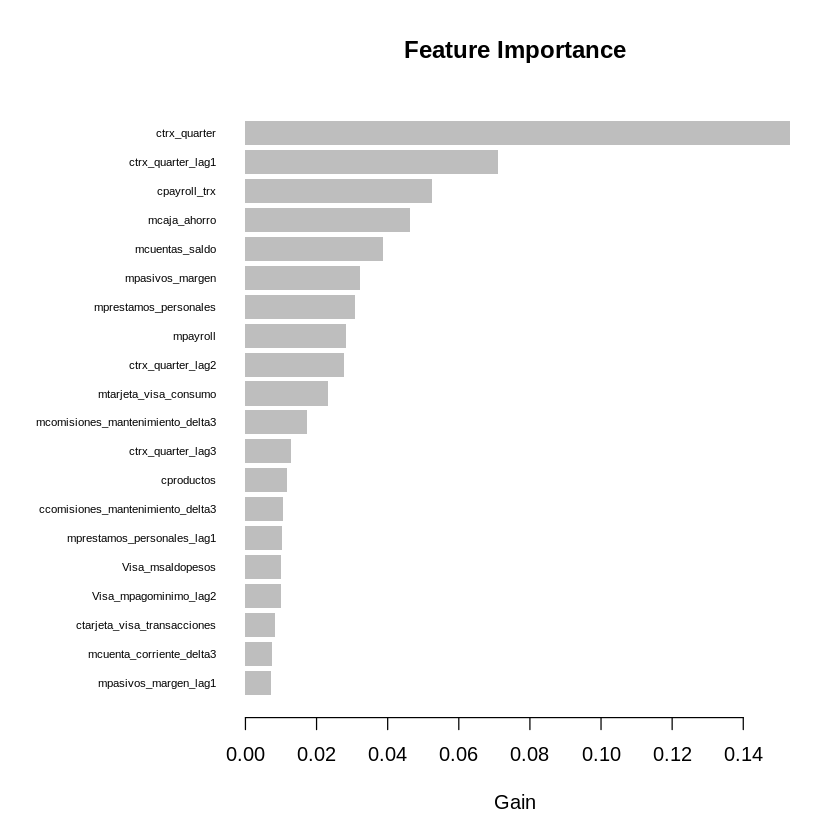

ERROR: Error in UseMethod("grid.draw"): no applicable method for 'grid.draw' applied to an object of class "c('data.table', 'data.frame')"


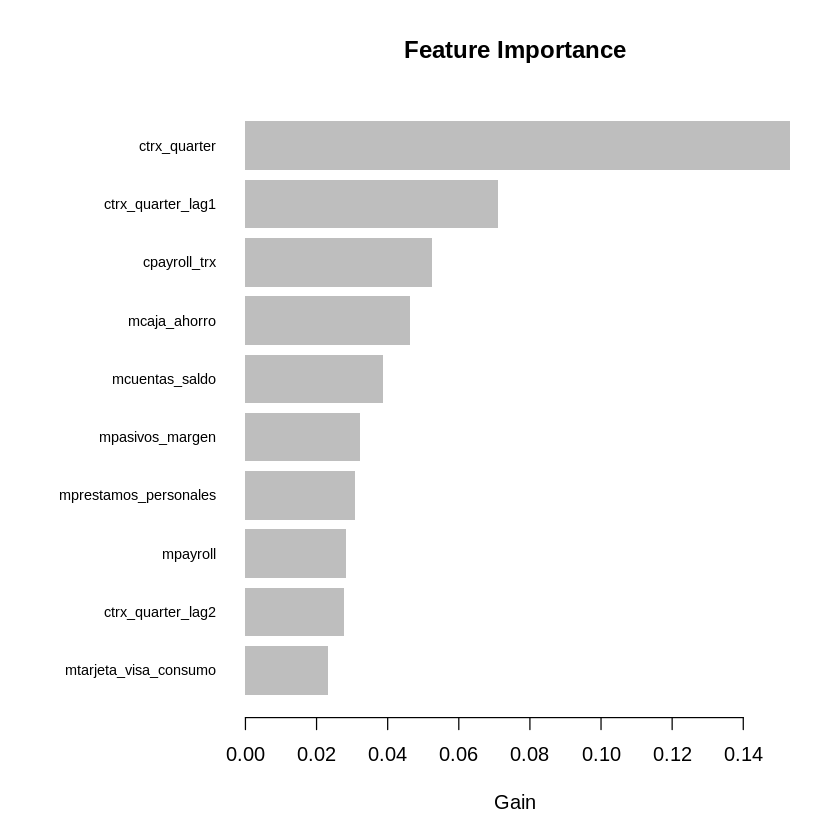

In [ ]:
library(lightgbm)
library(ggplot2) #install.packages("ggplot2")

lgb.plot.importance(
  tb_importancia,
  top_n = 20, # Opcional: muestra solo las 20 variables más importantes
  measure = "Gain" # Opcional: usa "Gain" o "Cover" (Gain es la predeterminada y usualmente la más útil)
)

p <- lgb.plot.importance(tb_importancia, top_n = 10)
ggsave("feature_importance.png", p, width = 8, height = 6) # Guarda el gráfico como PNG


### Scoring

Aplico el modelo final a los datos del futuro

In [ ]:
# # aplico el modelo a los datos sin clase

# dfuture <- dataset[foto_mes %in% PARAM$future]

# # aplico el modelo a los datos nuevos
# prediccion <- predict(
#   modelo_final,
#   data.matrix(dfuture[, campos_buenos, with= FALSE])
# )


ERROR: Error: object 'modelo' not found


In [ ]:
# Definir dfuture
dfuture <- dataset[foto_mes %in% PARAM$future]

# Aplicar cada modelo y guardar predicciones
predicciones_ensemble <- list()

cat("\n=== Generando predicciones con el ensamble ===\n")

for(i in 1:length(semillas)) {
  cat("Prediciendo con modelo", i, "\n")

  prediccion_temp <- predict(
    modelos_ensemble[[i]],
    data.matrix(dfuture[, campos_buenos, with = FALSE])
  )

  predicciones_ensemble[[i]] <- prediccion_temp
}

# Promediar las predicciones
prediccion <- rowMeans(do.call(cbind, predicciones_ensemble))

cat("Predicción final generada como promedio de", length(semillas), "modelos\n")


In [ ]:
# # inicilizo el dataset  drealidad
drealidad <- realidad_inicializar( dfuture, PARAM)

#### Tabla Prediccion

In [ ]:
# tabla de prediccion acá aparece la probabilidad

tb_prediccion <- dfuture[, list(numero_de_cliente, foto_mes)]
tb_prediccion[, prob := prediccion ]

# grabo las probabilidad del modelo
fwrite(tb_prediccion,
  file= "prediccion.txt",
  sep= "\t"
)


In [ ]:
# Se deben entregar 164876 predicciones, paquete premium de 202106
# La primer linea del archivo tiene los títulos, con lo cual 164876 + 1 lineas
#error dice que debe tener: Submission must have 164313 rows

cantidad_filas <- nrow(tb_prediccion)
print(paste("El data.table 'tb_prediccion' tiene", cantidad_filas, "filas."))

[1] "El data.table 'tb_prediccion' tiene 164313 filas."


In [ ]:
nrow(dataset[foto_mes == 202106])

[1] 164313

Kaggle Competition Submit

In [ ]:
PARAM$cortes

[1]  6000  6500  7000  7500  8000  8500  9000  9500 10000 10500 11000 11500
[13] 12000 12500 13000 13500 14000

In [ ]:
# genero archivos con los  "envios" mejores
# suba TODOS los archivos a Kaggle

# ordeno por probabilidad descendente
setorder(tb_prediccion, -prob)

dir.create("kaggle")

for (envios in PARAM$cortes) {

  tb_prediccion[, Predicted := 0L] # seteo inicial a 0
  tb_prediccion[1:envios, Predicted := 1L] # marco los primeros

  archivo_kaggle <- paste0("./kaggle/KA", PARAM$experimento, "_", envios, ".csv")

  # # grabo el archivo
  # fwrite(tb_prediccion[, list(numero_de_cliente, Predicted)],
  #   file= archivo_kaggle,
  #   sep= ","
  # )

  # grabo el archivo CON ENCABEZADOS
  fwrite(tb_prediccion[, list(numero_de_cliente, Predicted)],
    file = archivo_kaggle,
    sep = ",",
    col.names = TRUE  # <--- ESTO ES LO QUE FALTA
  )

  res <- realidad_evaluar( drealidad, tb_prediccion)

  options(scipen = 999)
  cat( "Envios=", envios, "\t",
    " TOTAL=", res$total,
    "  Public=", res$public,
    " Private=", res$private,
    "\n",
    sep= ""
  )

}

Warning message in dir.create("kaggle"):
“'kaggle' already exists”


Envios=6000	 TOTAL=-120000000  Public=-123066667 Private=-118685714
Envios=6500	 TOTAL=-130000000  Public=-131866667 Private=-129200000
Envios=7000	 TOTAL=-140000000  Public=-141800000 Private=-139228571
Envios=7500	 TOTAL=-150000000  Public=-152533333 Private=-148914286
Envios=8000	 TOTAL=-160000000  Public=-163200000 Private=-158628571
Envios=8500	 TOTAL=-170000000  Public=-172533333 Private=-168914286
Envios=9000	 TOTAL=-180000000  Public=-182133333 Private=-179085714
Envios=9500	 TOTAL=-190000000  Public=-191266667 Private=-189457143
Envios=10000	 TOTAL=-200000000  Public=-201333333 Private=-199428571
Envios=10500	 TOTAL=-210000000  Public=-209866667 Private=-210057143
Envios=11000	 TOTAL=-220000000  Public=-219666667 Private=-220142857
Envios=11500	 TOTAL=-230000000  Public=-229933333 Private=-230028571
Envios=12000	 TOTAL=-240000000  Public=-240533333 Private=-239771429
Envios=12500	 TOTAL=-250000000  Public=-250333333 Private=-249857143
Envios=13000	 TOTAL=-260000000  Public=-25

In [ ]:
write_yaml( PARAM, file="PARAM.yml")

In [ ]:
format(Sys.time(), "%a %b %d %X %Y")

[1] "Thu Sep 25 07:11:33 PM 2025"

#testeo

drealidad es el período a predecir con las columnas de interés y fold publico privado.  

Particionar arma este formato  fold = 1  es el 30% del dataset que representaría el "público" de la competencia y fold = 2 es el 70% de ldataset que representaría el "privado" de la competencia? y ambos folds mantienen la representación de los niveles de clase ternaria (continua, baja+1 y baja+2).

 Realidad_inicializar: ejecuta todo esto, arma el kaggle.  

 Realidad evaluar: junta predicciones con realidad en prealidad (cliente, clase ternaria, fold publico o privado y predicción 1 enviar 0 no enviar), calcula ganancias. tbl es tabla resumen de prealidad

In [ ]:
# particionar agrega una columna llamada fold a un dataset
#   que consiste en una particion estratificada segun agrupa
# particionar( data=dataset, division=c(70,30),
#  agrupa=clase_ternaria, seed=semilla)   crea una particion 70, 30

particionar <- function(data, division, agrupa= "", campo= "fold", start= 1, seed= NA) {
  if (!is.na(seed)) set.seed(seed, "L'Ecuyer-CMRG")

  bloque <- unlist(mapply(
    function(x, y) {rep(y, x)},division, seq(from= start, length.out= length(division))))

  data[, (campo) := sample(rep(bloque,ceiling(.N / length(bloque))))[1:.N],by= agrupa]
}

In [ ]:
# iniciliazo el dataset de realidad, para medir ganancia
realidad_inicializar <- function( pfuture, pparam) {

  # datos para verificar la ganancia
  drealidad <- pfuture[, list(numero_de_cliente, foto_mes, clase_ternaria)]

  particionar(drealidad,
    division= c(3, 7),
    agrupa= "clase_ternaria",
    seed= PARAM$semilla_kaggle
  )

  return( drealidad )
}

In [ ]:
# evaluo ganancia en los datos de la realidad

realidad_evaluar <- function( prealidad, pprediccion) {

  prealidad[ pprediccion,
    on= c("numero_de_cliente", "foto_mes"),
    predicted:= i.Predicted
  ]

  tbl <- prealidad[, list("qty"=.N), list(fold, predicted, clase_ternaria)]

  res <- list()
  res$public  <- tbl[fold==1 & predicted==1L, sum(qty*ifelse(clase_ternaria=="BAJA+2", 780000, -20000))]/0.3
  res$private <- tbl[fold==2 & predicted==1L, sum(qty*ifelse(clase_ternaria=="BAJA+2", 780000, -20000))]/0.7
  res$total <- tbl[predicted==1L, sum(qty*ifelse(clase_ternaria=="BAJA+2", 780000, -20000))]

  prealidad[, predicted:=NULL]
  return( res )
}

In [ ]:
# dataset_train_false_future <- dataset[foto_mes %in% PARAM$train_final]
# dataset_train_false_future[,.N,clase_ternaria]

In [ ]:
# # dejo los datos en el formato que necesita LightGBM

# dtrain_final_false_future <- lgb.Dataset(
#   data= data.matrix(dataset_train_false_future[, campos_buenos, with= FALSE]),
#   label= dataset_train_false_future[, clase01]
# )

In [ ]:
# #Entreno ensamble mis semillas

# cat("TESTEO Entrenando", length(PARAM$semillas), "modelos con diferentes semillas...\n")

# # Lista para guardar los modelos
# modelos_ensemble_false_future <- list()

# # Entrenar un modelo por cada semilla
# for(i in 1:length(PARAM$semillas)) {

#   cat("\n=== Entrenando modelo false_future", i, "de", length(PARAM$semillas), "con semilla", PARAM$semillas[i], "===\n")

#   # Setear la semilla
#   # set.seed(semillas[i])
#   # param_normalizado$seed <- semillas[i]

#   set.seed(PARAM$semillas[i])
#   param_normalizado$seed <- PARAM$semillas[i]

#   # Entrenar modelo
#   modelo_false_future <- lgb.train(
#     data = dtrain_final_false_future,
#     param = param_normalizado
#   )

#   # Guardar modelo
#   modelos_ensemble_false_future[[i]] <- modelo_false_future

#   cat("Modelo_false_future", i, "entrenado exitosamente\n")
# }

# cat("\n=== Ensamble de", length(PARAM$semillas), "modelos false_future completado ===\n")


In [ ]:
# # grabo a disco el modelo en un formato para seres humanos ... ponele ...

# # lgb.save(modelo_final, "modelo.txt" )


# # Grabo todos los modelos del ensamble
# for(i in 1:length(PARAM$semillas)) {
#   # lgb.save(modelos_ensemble_false_future[[i]], paste0("modelo_false_future_seed_", semillas[i], ".txt"))
#   lgb.save(modelos_ensemble_false_future[[i]], paste0("modelo_false_future_seed_", PARAM$semillas[i], ".txt"))
# }

# cat("\nTodos los modelos false_future guardados en disco\n")

In [ ]:
# Definir dfuture

PARAM$false_future <- c(202103)

false_future <- dataset[foto_mes %in% PARAM$false_future]

# Aplicar cada modelo y guardar predicciones
predicciones_ensemble_false_future <- list()

cat("\n=== Generando predicciones para testeo ===\n")

for(i in 1:length(PARAM$semillas)) {
# for(i in 1:length(semillas)) {
  cat("Prediciendo con modelo para test", i, "\n")

  prediccion_temp_false_future <- predict(
    modelos_ensemble[[i]],
    data.matrix(false_future[, campos_buenos, with = FALSE])
  )

  predicciones_ensemble_false_future[[i]] <- prediccion_temp_false_future
}

# Promediar las predicciones
prediccion_false_future <- rowMeans(do.call(cbind, predicciones_ensemble_false_future))

cat("Predicción final false_future generada como promedio de",
length(PARAM$semillas), "modelos \n")
# length(semillas), "modelos\n")



In [ ]:
# tabla de prediccion acá aparecen las probabilidades

tb_prediccion_false_future <- false_future[, list(numero_de_cliente, foto_mes)]
tb_prediccion_false_future[, prob := prediccion_false_future ]

# grabo las probabilidad del modelo
fwrite(tb_prediccion_false_future,
  file= "prediccion_false_future.txt",
  sep= "\t"
)


In [ ]:
# inicilizo el dataset  drealidad SOLO PARA BACKTESTING

drealidad <- realidad_inicializar( false_future, PARAM)


Kaggle Competition Submit

In [ ]:
PARAM$cortes

In [ ]:
# genero archivos con los  "envios" mejores
# suba TODOS los archivos a Kaggle

# ordeno por probabilidad descendente
setorder(tb_prediccion_false_future, -prob)

# dir.create("kaggle")

for (envios in PARAM$cortes) {

  tb_prediccion_false_future[, Predicted := 0L] # seteo inicial a 0
  tb_prediccion_false_future[1:envios, Predicted := 1L] # marco los primeros

  archivo_kaggle_false_future <- paste0("./kaggle/KAFF", PARAM$experimento, "_", envios, ".csv")

  # grabo el archivo CON ENCABEZADOS
  fwrite(tb_prediccion_false_future[, list(numero_de_cliente, Predicted)],
    file = archivo_kaggle_false_future,
    sep = ",",
    col.names = TRUE  # <--- ESTO ES LO QUE FALTA
  )
  res <- realidad_evaluar( drealidad, tb_prediccion_false_future)

  options(scipen = 999)
  cat( "Envios=", envios, "\t",
    " TOTAL=", res$total,
    "  Public=", res$public,
    " Private=", res$private,
    "\n",
    sep= ""
  )

}




In [ ]:
# Guardar resultados de ganancia por cada corte
resultados_ganancia <- data.table()

for (envios in PARAM$cortes) {

  tb_prediccion_false_future[, Predicted := 0L]
  tb_prediccion_false_future[1:envios, Predicted := 1L]

  archivo_kaggle_false_future <- paste0("./kaggle/KAFF", PARAM$experimento, "_", envios, ".csv")

  fwrite(tb_prediccion_false_future[, list(numero_de_cliente, Predicted)],
    file = archivo_kaggle_false_future,
    sep = ",",
    col.names = TRUE
  )

  res <- realidad_evaluar(drealidad, tb_prediccion_false_future)

  options(scipen = 999)
  cat("Envios=", envios, "\t",
    " TOTAL=", res$total,
    "  Public=", res$public,
    " Private=", res$private,
    "\n",
    sep = ""
  )

  # Guardar resultado
  resultados_ganancia <- rbind(resultados_ganancia,
    data.table(envios = envios, ganancia_total = res$total))
}

# Graficar
library(ggplot2)

p <- ggplot(resultados_ganancia, aes(x = envios, y = ganancia_total)) +
  geom_line(color = "#2C7BB6", size = 1) +
  geom_point(color = "#2C7BB6", size = 2) +
  geom_hline(yintercept = 0, linetype = "solid", color = "gray50", alpha = 0.3) +
  scale_x_continuous(labels = scales::comma) +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = paste0("Curva de Ganancia - Experimento ", PARAM$experimento),
    x = "Cantidad de Envios",
    y = "Ganancia Total ($)"
  ) +
  theme_minimal()

print(p)
ggsave("curva_ganancia.png", p, width = 10, height = 6, dpi = 300)

# un ejercidio aparte

In [ ]:
# solo un ejercicio
# Explora las probabilidades predichas para encontrar "codos" naturales


# Después de predecir en 202106
tb_prediccion[, prob := prediccion]
setorder(tb_prediccion, -prob)

# Agrega ranking
tb_prediccion[, rank := 1:.N]

# Visualiza distribución
plot(tb_prediccion$rank, tb_prediccion$prob, type="l",
     xlab="Ranking", ylab="Probabilidad",
     main="Distribución de Probabilidades Predichas")

# Busca el "codo" donde la probabilidad cae abruptamente
abline(h=0.05, col="red", lty=2)  # Umbral ejemplo

# Estadísticas por percentiles
cuantiles <- quantile(tb_prediccion$prob, probs=seq(0, 1, 0.1))
print(cuantiles)

# Cuántos clientes con prob > umbral
umbral <- 0.05
n_sobre_umbral <- tb_prediccion[prob > umbral, .N]
cat("Clientes con prob >", umbral, ":", n_sobre_umbral, "\n")

In [ ]:
write_yaml( PARAM, file="PARAM.yml")

In [ ]:
# Después de generar la predicción 'prediccion' LIMPIAR LOS MODELOS GUARDADOS
for(i in 1:length(semillas)) {
    file.remove(paste0("modelo_seed_", semillas[i], ".txt"))
}

In [ ]:
format(Sys.time(), "%a %b %d %X %Y")

Finalmente usted deberá cargar el resultado de su corrida en la Google Sheet Colaborativa,  hoja **TareaHogar04**
<br> Siéntase libre de agregar las columnas que hagan falta a la planilla

Finalmente usted deberá cargar el resultado de su corrida en la Google Sheet Colaborativa,  hoja **TareaHogar04**
<br> Siéntase libre de agregar las columnas que hagan falta a la planilla